# Plot Elements

---

## Overview
Here we will provide an overview of the different elements of a plot. Having the language to describe a figure is an important piece of navigating Python package documentation and finding the customization options for the features you'd like to change. This chapter does not provide an extensive list of the customization options for each plot element, but hopes to outline how to call them so you can begin to locate the correct documentation to make the unique changees relevant to your vision.

1. Data
1. Figures
1. Axis
1. Plot
1. Titles and Labels
1. Legends
1. Colorbars
1. Annotations

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Matplotlib](https://foundations.projectpythia.org/core/matplotlib.html) | Necessary | |
| [Cartopy](https://foundations.projectpythia.org/core/cartopy.html) | Necessary | |

- **Time to learn**: 40 minutes
---

In [43]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import geocat.viz as gv

## Data

The first piece of data visualization is the data!

Let's generate some dummy data to work with:

In [24]:
x = np.linspace(0, 20, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

## Figure

The figure is the object that contains your entire visualization. Creating a figure tends to be the first step in plotting, even if it doesn't currently show anything:

In [13]:
fig = plt.figure(figsize=(9.5, 8))

<Figure size 950x800 with 0 Axes>

## Axis

We then add axes to our plot. You can add multiple axes to one plot in order to produce subplots, or just one. Axes will automatically inherit their limits from the data plotted, or can be manually set.

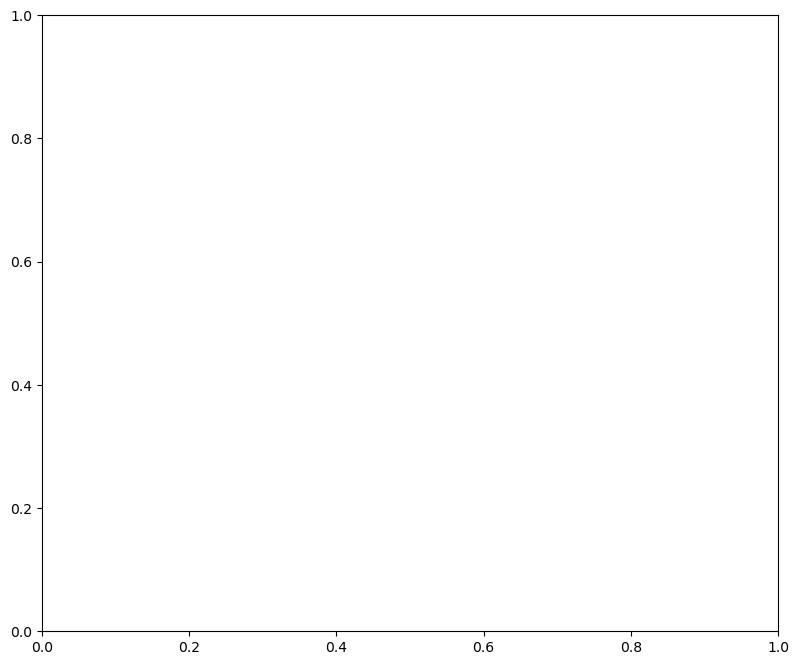

In [14]:
fig = plt.figure(figsize=(9.5, 8))
ax = plt.axes()

## Plot

Adding the data to the figure can be done through several different plot types: line, contour, bar, histogram. Here we use two line plots:

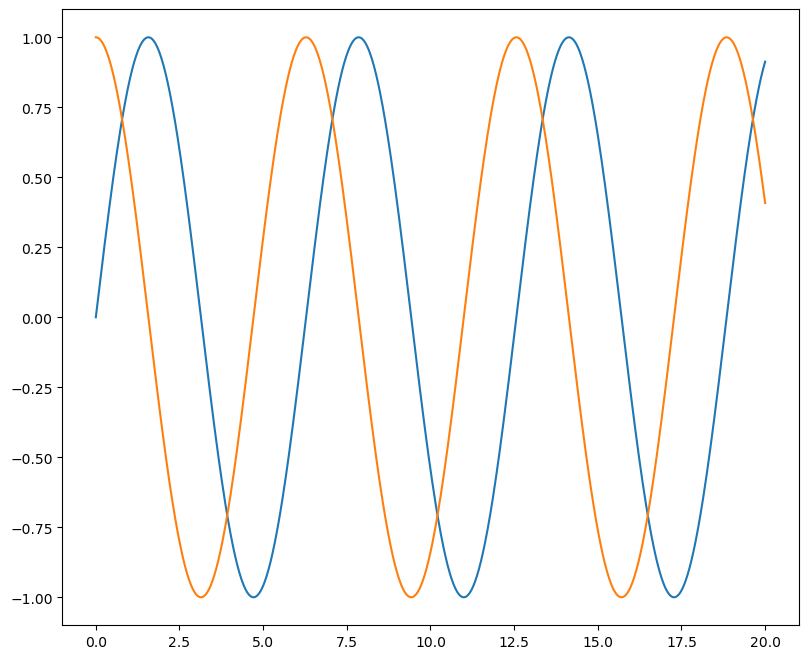

In [30]:
fig = plt.figure(figsize=(9.5, 8))
ax = plt.axes()

ax.plot(x,y1)
ax.plot(x,y2);

## Titles and Labels

Titles and labels are important for indicating what the figure is plotting. It is a good idea to include relevant units in your axis labels.

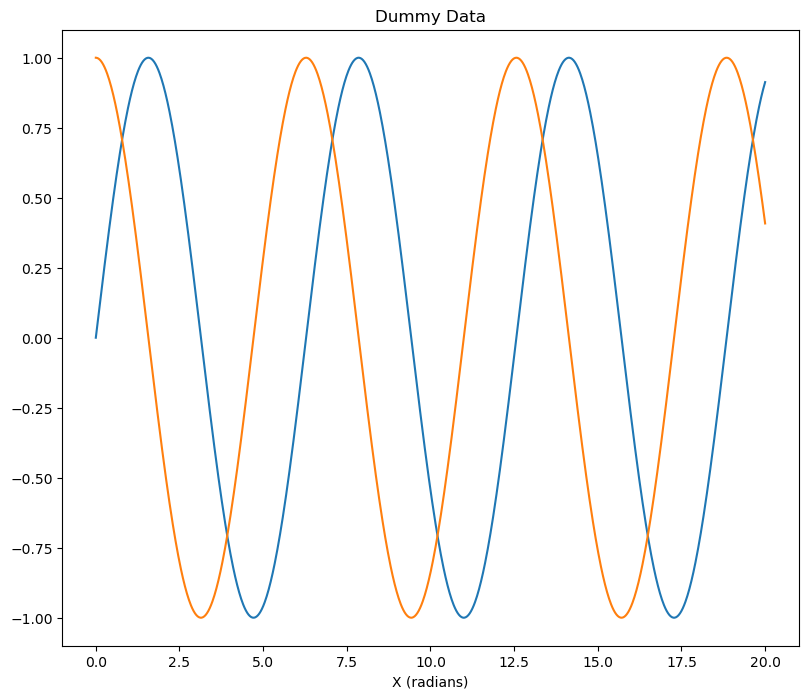

In [33]:
fig = plt.figure(figsize=(9.5, 8))
ax = plt.axes()

ax.plot(x,y1)
ax.plot(x,y2)

ax.set_title("Dummy Data")
ax.set_xlabel("X (radians)");

## Legends

If you're plotting multiple lines of data, it's a good idea to include a legend. Here is how you call or point to the legend:

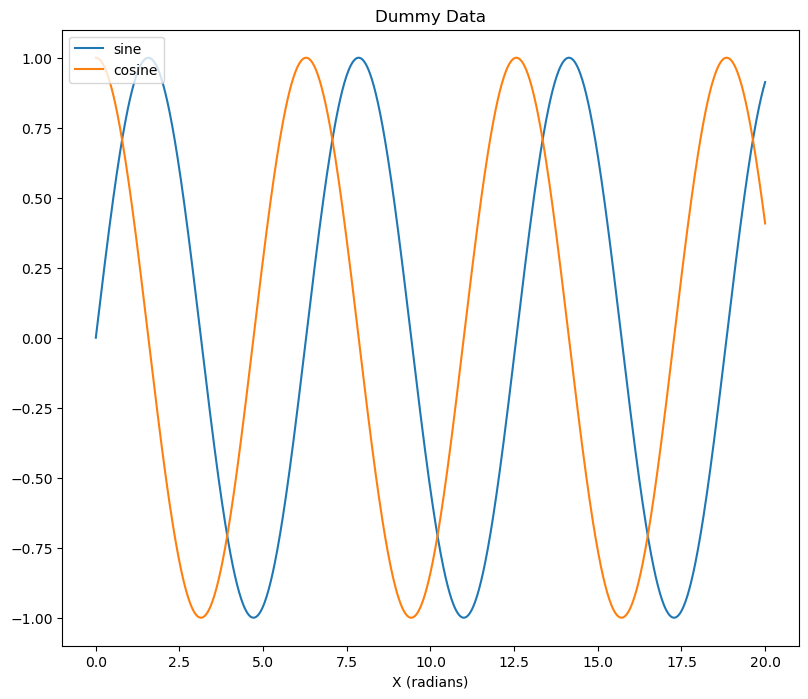

In [34]:
fig = plt.figure(figsize=(9.5, 8))
ax = plt.axes()

ax.plot(x,y1,label='sine')
ax.plot(x,y2,label='cosine')

ax.set_title("Dummy Data")
ax.set_xlabel("X (radians)")

plt.legend(loc="upper left");

## Colorbars

While legends are more appropriate for line or bar plots, colorbars are most commonly used for contour plots and sometimes to apply a third level of dimension to a scatter plot.

Let's shift our example to better demonstrate a colorbar by workign with a filled contour plot:

In [36]:
# Generate dummy data
data = [[1, 4, 5, 6, 8.2],
        [9, 8.4, 10, 10.6, 9.7],
        [4.4, 5, 0, 6.6, 1.4],
        [4.6, 5.2, 1.5, 7.6, 2.4]]

# Convert data into type xarray.DataArray
data = xr.DataArray(data,
                    dims=["lat", "lon"],
                    coords=dict(lat=np.arange(4), lon=np.arange(5)))

data

<xarray.DataArray (lat: 4, lon: 5)>
array([[ 1. ,  4. ,  5. ,  6. ,  8.2],
       [ 9. ,  8.4, 10. , 10.6,  9.7],
       [ 4.4,  5. ,  0. ,  6.6,  1.4],
       [ 4.6,  5.2,  1.5,  7.6,  2.4]])
Coordinates:
  * lat      (lat) int64 0 1 2 3
  * lon      (lon) int64 0 1 2 3 4

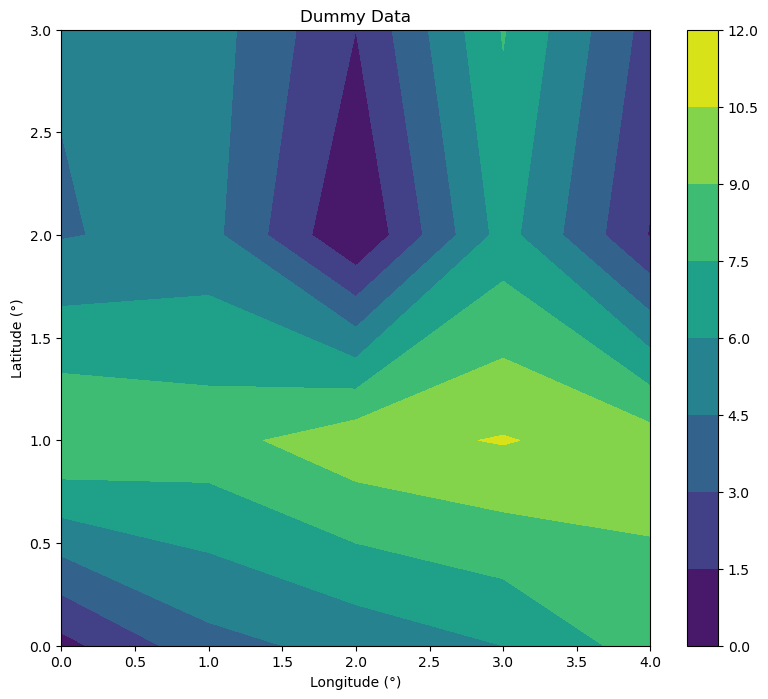

In [42]:
fig = plt.figure(figsize=(9.5, 8))
ax = plt.axes()

pcm = ax.contourf(data,cmap='viridis')

ax.set_title("Dummy Data")
ax.set_xlabel("Longitude (\N{DEGREE SIGN})")
ax.set_ylabel("Latitude (\N{DEGREE SIGN})")

fig.colorbar(pcm,ax=ax);

## Annotations

Additional annotations allow you to specify some text and a location to indicate almost anything. 

Here we use GeoCAT-viz to add annotations to the maxima in a contour plot:

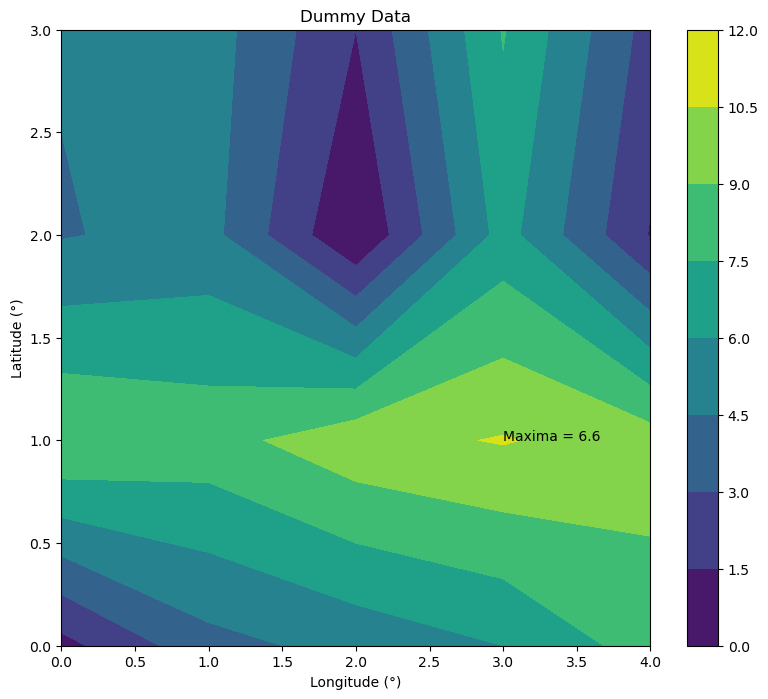

In [47]:
fig = plt.figure(figsize=(9.5, 8))
ax = plt.axes()

pcm = ax.contourf(data,cmap='viridis')

ax.set_title("Dummy Data")
ax.set_xlabel("Longitude (\N{DEGREE SIGN})")
ax.set_ylabel("Latitude (\N{DEGREE SIGN})")

fig.colorbar(pcm,ax=ax)

# Find local minimum with GeoCAT-Viz find_local_extrema
lmax = gv.find_local_extrema(data, eType='High')[0]

# Plot labels for local mins
max_value = data.data[lmin[1]][lmax[0]]
ax.text(lmax[0], lmax[1],'Maxima = '+str(max_value))

# Show plot
plt.show();

---

## Summary

There are several key elements to a Python plot and knowing what they are called is instrumental to begin your journey for further customization.

### What's next?


## Resources and references